# **Event Based Analysis**

## **Project Overview**

This project focuses on analyzing user behavior in a food-tech mobile application through two complementary approaches: funnel analysis and an A/A/B experiment.

### **Sales Funnel Analysis**
- Identify the main events recorded in the app and their sequence.
- Measure how many users progress through each stage of the funnel, from first interaction to payment.
- Quantify user drop-offs at every step and highlight the stages where most users churn.
- Estimate the overall conversion rate from entry to successful purchase.

### **A/A/B Test Evaluation**

- Users were randomly divided into three groups: two control groups (IDs 246 and 247, with the old font) and one test group (ID 248, with the new font).
- The A/A comparison allows us to validate data quality and test reliability by checking whether both control groups behave consistently.
- The A/B comparison assesses the effect of introducing new fonts on key user actions and overall conversion.
- Statistical significance tests are applied to determine whether observed differences are real or due to chance.

The overall goal is twofold: to detect weaknesses in the conversion funnel and to support design decisions with reliable data evidence. This way, the company can better understand where users struggle in the app and whether UI changes, such as typography, improve or hinder engagement and purchases.

In [1]:
#Import libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#Create df from csv file
data = pd.read_csv('logs_exp_us _aab.csv', sep = '\t')

#Check df's data
data.info()
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


In [3]:
#Change column names
data.columns = ['event_name', 'user_id', 'event_time', 'group']

#Check changes
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   user_id     244126 non-null  int64 
 2   event_time  244126 non-null  int64 
 3   group       244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,event_name,user_id,event_time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
#Change 'event_time' dtype from str to datetime/timestamp
data['event_time'] = pd.to_datetime(data['event_time'], unit = 's')

#Check change
data.head(5)

,event_name,user_id,event_time,group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [5]:
#Create 'event_date' from 'event_time' 
data['event_date'] = data['event_time'].dt.date

#Check changes
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   event_time  244126 non-null  datetime64[ns]
 3   group       244126 non-null  int64         
 4   event_date  244126 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.3+ MB


,event_name,user_id,event_time,group,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [6]:
#Change 'event_date' dtype from str to datetime 
data['event_date'] = pd.to_datetime(data['event_date'])

#Check change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   event_time  244126 non-null  datetime64[ns]
 3   group       244126 non-null  int64         
 4   event_date  244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [7]:
#Find test's unique events
print('Unique Events: ', data['event_name'].nunique())

#Find event names 
events = data['event_name'].unique()
print('Events: ', events)

#Find unique users
print('Unique users: ', data['user_id'].nunique())

Unique Events:  5
Events:  ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
Unique users:  7551


In [8]:
#Encontrar el promedio de eventos por usuario
avg_events = data['event_name'].count() / data['user_id'].nunique()
print(f'Average events per user: {avg_events:.2f}')

Average events per user: 32.33


In [9]:
#Find events per user
events_per_user = data.groupby('user_id')['event_name'].count()
print(events_per_user)

user_id
6888746892508752         1
6909561520679493         5
6922444491712477        47
7435777799948366         6
7702139951469979       137
                      ... 
9217594193087726423      9
9219463515465815368     17
9220879493065341500      7
9221926045299980007      7
9222603179720523844     59
Name: event_name, Length: 7551, dtype: int64


In [10]:
#Find max & min date of the test
print('Max Date: ', data['event_date'].max())
print('Min Date: ', data['event_date'].min())

Max Date:  2019-08-07 00:00:00
Min Date:  2019-07-25 00:00:00


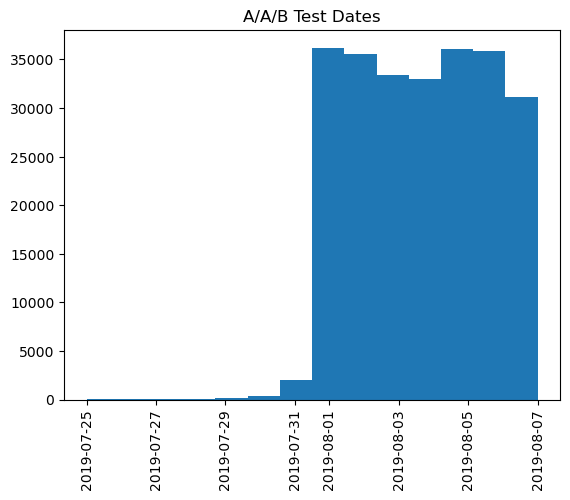

In [11]:
#PLot histogram to find relevant dates for the test 
plt.hist(data['event_date'], bins = 14)
plt.title('A/A/B Test Dates')
plt.xticks(rotation = 90)
plt.show()

It appears that the dates with the most relevant information are from August 1st onwards, so information from that date onwards will be used.

In [12]:
#Filter data by relevant dates
data = data[data['event_date'] > '2019-07-31'].reset_index()

#Check changes
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241298 entries, 0 to 241297
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       241298 non-null  int64         
 1   event_name  241298 non-null  object        
 2   user_id     241298 non-null  int64         
 3   event_time  241298 non-null  datetime64[ns]
 4   group       241298 non-null  int64         
 5   event_date  241298 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.0+ MB


,index,event_name,user_id,event_time,group,event_date
0,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
1,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
3,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
4,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


With the date filtering starting on August 1, just over 3,000 lines were lost in the data file. This is not a significant loss considering the current data file has 241,297 lines of information, a loss of just over 1%. The integrity of the data is maintained in terms of quantity.

In [13]:
#Check that the test's three groups are still in the df after dropping irrelevant dates
print('Test Groups: ', data['group'].nunique())

Test Groups:  3


In [14]:
#Find frequency for each event
event_frequency = data.groupby('event_name')['event_name'].count()
print(event_frequency.sort_values(ascending = False))

event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


In [15]:
#Find unique users for each event
event_frequency_by_user = data.groupby('event_name')['user_id'].nunique()
event_frequency_by_user = event_frequency_by_user.to_frame().reset_index()
print(event_frequency_by_user)

                event_name  user_id
0         CartScreenAppear     3734
1         MainScreenAppear     7419
2       OffersScreenAppear     4593
3  PaymentScreenSuccessful     3539
4                 Tutorial      840


In [16]:
#Order events by descending value
event_frequency_by_user.columns = ['event_name','users']
event_frequency_by_user = event_frequency_by_user.sort_values(by = 'users', ascending = False)
print(event_frequency_by_user)

                event_name  users
1         MainScreenAppear   7419
2       OffersScreenAppear   4593
0         CartScreenAppear   3734
3  PaymentScreenSuccessful   3539
4                 Tutorial    840


In [17]:
#Get the proportion of users who move from one event to another relative to the initial 'MainScreenAppear' event
event_frequency_by_user['rate'] = event_frequency_by_user['users'] / event_frequency_by_user['users'].max()
print(event_frequency_by_user)

                event_name  users      rate
1         MainScreenAppear   7419  1.000000
2       OffersScreenAppear   4593  0.619086
0         CartScreenAppear   3734  0.503302
3  PaymentScreenSuccessful   3539  0.477018
4                 Tutorial    840  0.113223


I consider the main line of action to be "MainScreenAppear", "OfferScreenAppear", "CartScreenAppear" and "PaymentScreenSuccessful", in respective order, while "Tutorial" is an optional action for each user who needs help with the page, which very few use and which does not interfere with the main line.

In [18]:
#Get the proportion of users who move from one event to another relative to the previous event
event_frequency_by_user['step_rate'] = event_frequency_by_user['users'] / event_frequency_by_user['users'].shift(1)
print(event_frequency_by_user)

                event_name  users      rate  step_rate
1         MainScreenAppear   7419  1.000000        NaN
2       OffersScreenAppear   4593  0.619086   0.619086
0         CartScreenAppear   3734  0.503302   0.812976
3  PaymentScreenSuccessful   3539  0.477018   0.947777
4                 Tutorial    840  0.113223   0.237355


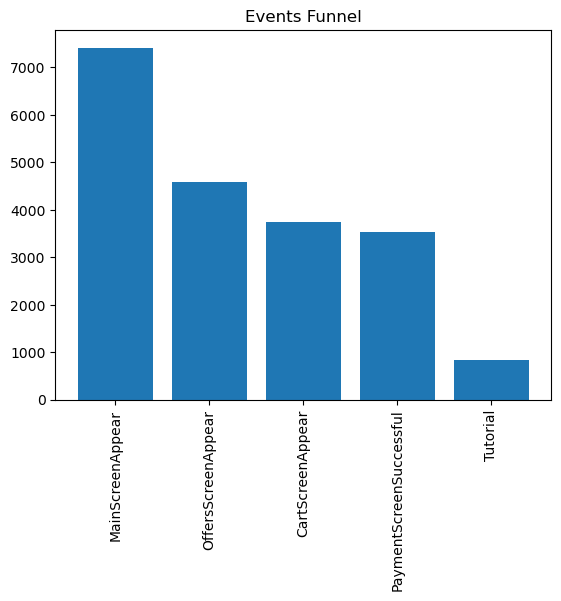

In [19]:
#PLot events to appreciate the funnel
plt.bar(event_frequency_by_user['event_name'], event_frequency_by_user['users'])
plt.xticks(rotation = 90)
plt.title('Events Funnel')
plt.show()

Looking at the event funnel graph and the numerical description above, we can see that the event that loses the most users is 'OfferScreenAppear,' since just under 3,000 users were lost from the first 'MainScreenAppear' event. This means that nearly 38% of users never see the offer screen or even add something to their cart. However, this is typical for e-commerce sites, as many users may arrive looking for something other than what the site offers.

On the other hand, it can be seen that 47% of users who visit the site place an order, meaning a very high conversion rate, which is great news for user behavior.

In [20]:
#Encontrar cuantos usuarios únicos hay en cada grupo de prueba
print('Group 246 Users: ', data[data['group'] == 246]['user_id'].nunique())
print('Group 247 Users: ', data[data['group'] == 247]['user_id'].nunique())
print('Group 248 Users: ', data[data['group'] == 248]['user_id'].nunique())

Group 246 Users:  2484
Group 247 Users:  2513
Group 248 Users:  2537


In [21]:
#Define the function to find the statistical difference between groups by event using the nonparametric Wilcoxon-Mann-Whitney test
def a_b_testing(group1, group2, event_name):

    #Separate data by group
    g1 = data[data['group'] == group1]
    g2 = data[data['group'] == group2]

    #Group groups by event type
    event_by_users_g1 = g1[g1['event_name'] == event_name].groupby('user_id').agg({'user_id': pd.Series.nunique})
    event_by_users_g2 = g2[g2['event_name'] == event_name].groupby('user_id').agg({'user_id': pd.Series.nunique})

    #Do samples for the nonparametric Wilcoxon-Mann-Whitney test
    sample_g1 = pd.concat([event_by_users_g1['user_id'], pd.Series(0, index = np.arange(data[data['group'] == group1]['user_id'].count() - 
                len(event_by_users_g1['user_id'])), name = 'event')], axis = 0)
    sample_g2 = pd.concat([event_by_users_g2['user_id'], pd.Series(0, index = np.arange(data[data['group'] == group2]['user_id'].count() - 
                len(event_by_users_g2['user_id'])), name = 'event')], axis = 0)

    #Statistical significance
    alpha = 0.05

    #P Value
    p_value = stats.mannwhitneyu(sample_g1, sample_g2)[1]

    #Answer
    if p_value < alpha: 
        return f"P Value: {p_value:.3f} Reject H0, there is statistical difference between {group1}/{group2} for the {event_name} event"
    else:
        return f"P Value: {p_value:.3f} Accept H0, there is no statistical difference between {group1}/{group2} for the {event_name} event"
  

The significance level of 0.05 was chosen to be more stringent and reduce the margin of error, meaning that possibly 1 in every 20 results would be incorrect. After performing 15 tests, the results would fall within the range that would allow us to determine whether they are correct.

## **A/A Comparison**

Se realiza la comparación de todos los eventos para los grupos 246 y 247

In [22]:
a_b_testing(246, 247, 'MainScreenAppear')

'P Value: 0.157 Accept H0, there is no statistical difference between 246/247 for the MainScreenAppear event'

In [23]:
a_b_testing(246, 247, 'OffersScreenAppear')

'P Value: 0.681 Accept H0, there is no statistical difference between 246/247 for the OffersScreenAppear event'

In [24]:
a_b_testing(246, 247, 'CartScreenAppear')

'P Value: 0.865 Accept H0, there is no statistical difference between 246/247 for the CartScreenAppear event'

In [25]:
a_b_testing(246, 247, 'PaymentScreenSuccesful')

'P Value: 1.000 Accept H0, there is no statistical difference between 246/247 for the PaymentScreenSuccesful event'

In [26]:
a_b_testing(246, 247, 'Tutorial')

'P Value: 0.578 Accept H0, there is no statistical difference between 246/247 for the Tutorial event'

In all events for groups 246 and 247, no statistical differences were found in terms of users. Therefore, traffic distribution is carried out correctly.

## **A1/B Comparison**

A comparison is made of all events for groups 246 and 248.

In [27]:
a_b_testing(246, 248, 'MainScreenAppear')

'P Value: 0.092 Accept H0, there is no statistical difference between 246/248 for the MainScreenAppear event'

Since there is no difference, it can be said that traffic is being distributed correctly in both groups.

In [28]:
a_b_testing(246, 248, 'OffersScreenAppear')

'P Value: 0.045 Reject H0, there is statistical difference between 246/248 for the OffersScreenAppear event'

There seems to be a difference between users who reach OffersScreenAppear in group B.

In [29]:
a_b_testing(246, 248, 'CartScreenAppear')

'P Value: 0.019 Reject H0, there is statistical difference between 246/248 for the CartScreenAppear event'

There seems to be a difference between users who reach CartScreenAppear in group B

In [30]:
a_b_testing(246, 248, 'PaymentScreenSuccesful')

'P Value: 1.000 Accept H0, there is no statistical difference between 246/248 for the PaymentScreenSuccesful event'

There is no difference between groups when paying for an order, it seems that the same number of people place orders whether in group A1 or B.

In [31]:
a_b_testing(246, 248, 'Tutorial')

'P Value: 0.471 Accept H0, there is no statistical difference between 246/248 for the Tutorial event'

The traffic split for groups A1 and B was correct, there was a difference in the OffersScreenAppear and CartScreenAppear events, and finally there was no difference in the PaymentScreenSuccesful event, so it can be concluded that although group B may attract or retain more users, the conversion rate does not change compared to the control group A1.

## **A2/B Comparison**

Comparison of all events for groups 247 and 248 is performed.

In [32]:
a_b_testing(247, 248, 'MainScreenAppear')

'P Value: 0.002 Reject H0, there is statistical difference between 247/248 for the MainScreenAppear event'

Since there is no difference, it can be said that traffic is being distributed correctly in both groups.

In [33]:
a_b_testing(247, 248, 'OffersScreenAppear')

'P Value: 0.016 Reject H0, there is statistical difference between 247/248 for the OffersScreenAppear event'

There seems to be a difference between users who reach CartScreenAppear in group B

In [34]:
a_b_testing(247, 248, 'CartScreenAppear')

'P Value: 0.012 Reject H0, there is statistical difference between 247/248 for the CartScreenAppear event'

There seems to be a difference between users who reach CartScreenAppear in group B

In [35]:
a_b_testing(247, 248, 'PaymentScreenSuccesful')

'P Value: 1.000 Accept H0, there is no statistical difference between 247/248 for the PaymentScreenSuccesful event'

There is no difference between groups when paying for an order, it seems that the same number of people place orders whether in group A2 or B.

In [36]:
a_b_testing(247, 248, 'Tutorial')

'P Value: 0.200 Accept H0, there is no statistical difference between 247/248 for the Tutorial event'

The traffic split for groups A2 and B was correct, there was a difference in the OffersScreenAppear and CartScreenAppear events, and finally there was no difference in the PaymentScreenSuccesful event, so it can be concluded that although group B may attract or retain more users, the conversion rate does not change compared to the control group A2.

## **Conclusion**

Apparently group B has much better results in retaining users between 'MainScreenAppear' and 'CartScreenAppear', which indicates that more users are deciding to make a purchase, however, since no difference was obtained between group B and the control groups A1 and A2 on the 'PaymentScreenSuccesful' event, it is concluded that there is no difference in terms of conversion. Therefore, group B does not fulfill its main function, which is to increase the number of purchases per user, however, it is successful in terms of user retention between events. I consider that the test should be stopped and group B declared unsatisfactory.